## Import packages 

In [1]:
# import modules
import pandas as pd 
import numpy as np
import datetime

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display
from sklearn.impute import SimpleImputer

## Read Data 

In [2]:
# Read the data 
data_file_path = 'Data/LoanExport.csv'

# to avoid data type error in PostalCode Column and use LoanSeqNum as an index_col
# read "FirstPaymentDate" and "MaturityDate" as strings to convert them into datetime later 
loan_data = pd.read_csv(data_file_path, 
                        dtype={"PostalCode": "str", "FirstPaymentDate": "str", "MaturityDate": "str"}, 
                        index_col='LoanSeqNum')

print("Loan data shape: ", loan_data.shape)

Loan data shape:  (291451, 27)


## Data exploration and EDA 

In [3]:
loan_data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyType,PostalCode,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,199902,N,202901,16974,25,1,O,89,27,...,SF,60400,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
F199Q1015092,0,199902,N,202901,19740,0,1,O,73,17,...,SF,80200,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
F199Q1266886,0,199902,N,202901,29940,0,1,O,75,16,...,SF,66000,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
F199Q1178167,0,199902,N,202901,31084,0,1,O,76,14,...,SF,90700,N,360,2,GM,GMACMTGECORP,0,0,35
F199Q1178517,0,199902,N,202901,35644,0,1,O,78,18,...,SF,7600,N,360,2,GM,GMACMTGECORP,0,0,54


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291451 entries, F199Q1268030 to F199Q1220923
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  object 
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  object 
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         29

In [5]:
loan_data.describe()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [6]:
# check if there is any invalid values in the data 
cols = loan_data.columns 
for col in cols: 
    unique_vals = loan_data[col].unique()
    print("Unique values in {}: {}".format(col, unique_vals))

Unique values in CreditScore: [  0 335 342 363 366 370 375 391 396 445 462 466 471 476 477 478 479 481
 482 483 485 486 487 489 490 491 492 493 494 495 496 497 498 499 500 501
 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519
 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537
 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555
 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573
 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591
 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609
 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627
 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645
 646 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663
 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681
 682 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699
 700 701 702 703 704 

Unique values in PPM: ['N' 'X' 'Y']
Unique values in ProductType: ['FRM  ']
Unique values in PropertyState: ['IL' 'CO' 'KS' 'CA' 'NJ' 'WI' 'FL' 'CT' 'GA' 'TX' 'MD' 'MA' 'SC' 'WY'
 'NC' 'AZ' 'IN' 'MS' 'NY' 'WA' 'AR' 'VA' 'MN' 'LA' 'PA' 'OR' 'RI' 'UT'
 'MI' 'TN' 'AL' 'MO' 'IA' 'NM' 'NV' 'VT' 'OH' 'NE' 'HI' 'ID' 'PR' 'DC'
 'GU' 'KY' 'NH' 'SD' 'ME' 'MT' 'OK' 'WV' 'DE' 'ND' 'AK']
Unique values in PropertyType: ['SF' 'PU' 'CO' 'MH' 'CP' 'LH' 'X ']
Unique values in PostalCode: ['60400' '80200' '66000' '90700' '7600' '80400' '53100' '32800' '6400'
 '67000' '30100' '30000' '30600' '30200' '30300' '78700' '77700' '20800'
 '1800' '29400' '82000' '60000' '60200' '60600' '60100' '29000' '75200'
 '27500' '7700' '79900' '86000' '33300' '33000' '46800' '76100' '27400'
 '29600' '39500' '6100' '46000' '14800' '39100' '32200' '99300' '72200'
 '91300' '91700' '24500' '33100' '53000' '55300' '55400' '29500' '11900'
 '7000' '7900' '70000' '7400' '11400' '85200' '85300' '15000' '97200'
 '97000' '2800' '2000'

 131 154 162 179 128 178 125 155 159 142 161 171]
Unique values in MonthsInRepayment: [ 52 144  67  35  54  42  44 145  64 212  37  47  53  55  66  26  38  36
  39  40  11 176  46 197 210  56 118  63  24  28  91  50  22 211 199  23
  30 125  41  76  49  18  19  43  60  83  95  29  45  13   6  48  62  14
  15 111  51  17  75  58  27  10  31 133 165 156  33  68 205  57 159  81
 191 194 114  59 100 134  74   9  34  77 170 122  69  72 206 148 153 101
 180   8  32   5 207   7 128  71  65  79 174 195 151 149  21  12 137 130
  70 173 166  61 160  20 178   3 147   2 164 139 108  92 209 102  87  94
  73 123  16 142   1 172 109 141 175 103 168 155 177 158 138  25 110  98
  84 208 188 106 112 121 136 179   4 154 161 157 150  80 183  93 143 162
 126  89 184  82 117 107 193  85 124 192  78 169 104 131 140 163 182 132
 135  86 129 186 127 189 190 198 202 167 146  90 119  99 201 120  96 116
 105 171  88 113 181 204  97 203 185 196 115 152 200 187]


We see that some of the data is set unproperly like:
1. `CreditScore` should have values between 300 and 850 only >> replace 0s with 850
2. `FirstPaymentDate` and `MaturityDate` should be parsed 
1. Some of the columns which are objects has values X, and it maybe a placehoder for null values: `NumBorrowers`, `PostalCode`, `PropertyType`, `PPM`, `FirstTimeHomebuyer`, `MSA`
2. Some columns has spaces before or after the string: `ServicerName`, `ProductType`
3. `Units` should has values 1, 2, 3, 4 only 
4. `OCLTV` and `LTV` should have values between 1 and 998 
5. `DTI` should has values between 1 and 65
6. `OrigInterestRate` should has values between 0 and 25 
7. `ProductType` has only one value so that it's not useful here 
8. `MonthsDelinquent` has information about the target value, so we should drop it 
9. `NumBorrowers` is object >> we should convert it to int

In [7]:
# check max and min values for our columns with conditions 
print("CreditScore min value: ", loan_data["CreditScore"].min())
print("CreditScore max value: ", loan_data["CreditScore"].max())

print("*" *50)
print("Units min value: ", loan_data["Units"].min())
print("Units max value: ", loan_data["Units"].max())

print("*" *50)
print("OCLTV min value: ", loan_data["OCLTV"].min())
print("OCLTV max value: ", loan_data["OCLTV"].max())

print("*" *50)
print("LTV min value: ", loan_data["LTV"].min())
print("LTV max value: ", loan_data["LTV"].max())

print("*" *50)
print("Units min value: ", loan_data["Units"].min())
print("Units max value: ", loan_data["Units"].max())

print("*" *50)
print("DTI min value: ", loan_data["DTI"].min())
print("DTI max value: ", loan_data["DTI"].max())

print("*" *50)
print("OrigInterestRate min value: ", loan_data["OrigInterestRate"].min())
print("OrigInterestRate max value: ", loan_data["OrigInterestRate"].max())

CreditScore min value:  0
CreditScore max value:  849
**************************************************
Units min value:  0
Units max value:  4
**************************************************
OCLTV min value:  0
OCLTV max value:  110
**************************************************
LTV min value:  0
LTV max value:  103
**************************************************
Units min value:  0
Units max value:  4
**************************************************
DTI min value:  0
DTI max value:  65
**************************************************
OrigInterestRate min value:  4.0
OrigInterestRate max value:  12.35


### Handling invalid data  

In [8]:
loan_data.loc[loan_data.CreditScore == 0, "CreditScore"] = 850
loan_data.loc[loan_data.Units == 0, "Units"] = 4 
loan_data.loc[loan_data.OCLTV == 0, "OCLTV"] = max(loan_data.OCLTV)
loan_data.loc[loan_data.LTV == 0, "LTV"] = max(loan_data.LTV)
loan_data.loc[loan_data.DTI == 0, "DTI"] = 65

loan_data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyType,PostalCode,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,850,199902,N,202901,16974,25,1,O,89,27,...,SF,60400,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
F199Q1015092,850,199902,N,202901,19740,0,1,O,73,17,...,SF,80200,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
F199Q1266886,850,199902,N,202901,29940,0,1,O,75,16,...,SF,66000,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
F199Q1178167,850,199902,N,202901,31084,0,1,O,76,14,...,SF,90700,N,360,2,GM,GMACMTGECORP,0,0,35
F199Q1178517,850,199902,N,202901,35644,0,1,O,78,18,...,SF,7600,N,360,2,GM,GMACMTGECORP,0,0,54


### dropping unnecessary columns

In [9]:
# drop the MonthsDelinquent column as it has information about the target and ProductType as it has just 1 value
loan_data.drop(["ProductType", "MonthsDelinquent", "PostalCode", "MSA", "SellerName", "ServicerName", 
                "PropertyState", "PropertyType"], 
               axis=1, inplace=True)
print("Loan data shape after dropping the MonthsDelinquent and ProductType columns: ", loan_data.shape)

Loan data shape after dropping the MonthsDelinquent and ProductType columns:  (291451, 19)


### parsing dates: `FirstPaymentDate` and `MaturityDate`

In [10]:
loan_data['FirstPaymentDateParsed'] = pd.to_datetime(loan_data['FirstPaymentDate'], format="%Y%m", infer_datetime_format=True)
loan_data["FirstPaymentYear"] = loan_data['FirstPaymentDateParsed'].dt.year
loan_data["FirstPaymentmonth"] = loan_data["FirstPaymentDateParsed"].dt.month

loan_data['MaturityDateParsed'] = pd.to_datetime(loan_data['MaturityDate'], format="%Y%m", infer_datetime_format=True)
loan_data["MaturityYear"] = loan_data['MaturityDateParsed'].dt.year
loan_data["Maturitymonth"] = loan_data["MaturityDateParsed"].dt.month

# drop the MonthsDelinquent column as it has information about the target and ProductType as it has just 1 value
loan_data.drop(["FirstPaymentDate", "FirstPaymentDateParsed", "MaturityDate", "MaturityDateParsed"], axis=1, inplace=True)
print("Loan data shape: ", loan_data.shape)

Loan data shape:  (291451, 21)


In [11]:
loan_data.head()

,CreditScore,FirstTimeHomebuyer,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,...,PPM,LoanPurpose,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsInRepayment,FirstPaymentYear,FirstPaymentmonth,MaturityYear,Maturitymonth
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,850,N,25,1,O,89,27,117000,89,6.750,...,N,P,360,2,0,52,1999,2,2029,1
F199Q1015092,850,N,0,1,O,73,17,109000,73,6.500,...,N,N,360,1,0,144,1999,2,2029,1
F199Q1266886,850,N,0,1,O,75,16,88000,75,6.875,...,N,N,360,2,0,67,1999,2,2029,1
F199Q1178167,850,N,0,1,O,76,14,160000,76,6.875,...,N,N,360,2,0,35,1999,2,2029,1
F199Q1178517,850,N,0,1,O,78,18,109000,78,7.125,...,N,N,360,2,0,54,1999,2,2029,1


In [12]:
loan_data.describe()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsInRepayment,FirstPaymentYear,FirstPaymentmonth,MaturityYear,Maturitymonth
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,712.404641,9.216685,1.026049,76.962416,34.002354,124940.387921,76.939753,6.926547,359.835375,0.197848,60.805291,1999.006790,4.081537,2028.992826,3.084488
std,51.947505,12.648273,0.203117,15.233433,13.348098,53657.440624,15.222346,0.343541,2.286939,0.398378,46.142599,0.137242,0.971147,0.161970,0.974165
min,335.000000,0.000000,1.000000,6.000000,1.000000,8000.000000,6.000000,4.000000,301.000000,0.000000,1.000000,1999.000000,1.000000,2024.000000,1.000000
25%,676.000000,0.000000,1.000000,70.000000,25.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,34.000000,1999.000000,3.000000,2029.000000,2.000000
50%,718.000000,0.000000,1.000000,80.000000,33.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,48.000000,1999.000000,4.000000,2029.000000,3.000000
75%,753.000000,25.000000,1.000000,90.000000,41.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,63.000000,1999.000000,5.000000,2029.000000,4.000000
max,850.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,212.000000,2013.000000,12.000000,2043.000000,12.000000


### Checking duplicates values 

In [13]:
loan_data.duplicated(keep="last").tail()

LoanSeqNum
F199Q1220925    False
F199Q1401332    False
F199Q1401282    False
F199Q1220924    False
F199Q1220923    False
dtype: bool

There are no duplicates in the dataset 

### Checking missing values 

In [14]:
loan_data.isnull().sum()

CreditScore           0
FirstTimeHomebuyer    0
MIP                   0
Units                 0
Occupancy             0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
Channel               0
PPM                   0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
EverDelinquent        0
MonthsInRepayment     0
FirstPaymentYear      0
FirstPaymentmonth     0
MaturityYear          0
Maturitymonth         0
dtype: int64

In [15]:
# Select categorical columns
categorical_cols = [col for col in loan_data.columns if
                   loan_data[col].dtype == 'object']

# select numerical columns 
numerical_cols = [col for col in loan_data.columns if
                 loan_data[col].dtype in ['int64', 'float64']]

# strip each categorical column 
for col in categorical_cols:
    loan_data[col] = loan_data[col].str.strip()

# replace Xs with Null values 
loan_data.replace('X', np.nan, inplace=True)

# check  missing values 
loan_data.isnull().sum()

CreditScore               0
FirstTimeHomebuyer    78015
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                    5405
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers            339
EverDelinquent            0
MonthsInRepayment         0
FirstPaymentYear          0
FirstPaymentmonth         0
MaturityYear              0
Maturitymonth             0
dtype: int64

In [16]:
# count unique values for each column 
(loan_data.nunique()).sort_values()

FirstTimeHomebuyer      2
EverDelinquent          2
NumBorrowers            2
PPM                     2
Occupancy               3
LoanPurpose             3
Channel                 4
Units                   4
FirstPaymentYear        8
FirstPaymentmonth      12
Maturitymonth          12
MaturityYear           12
MIP                    37
OrigLoanTerm           61
DTI                    65
LTV                    96
OCLTV                 101
MonthsInRepayment     212
OrigInterestRate      254
CreditScore           370
OrigUPB               375
dtype: int64

In [17]:
print(loan_data.shape)
display(loan_data.head())
print(loan_data.info())

(291451, 21)


,CreditScore,FirstTimeHomebuyer,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,...,PPM,LoanPurpose,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsInRepayment,FirstPaymentYear,FirstPaymentmonth,MaturityYear,Maturitymonth
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,850,N,25,1,O,89,27,117000,89,6.750,...,N,P,360,2,0,52,1999,2,2029,1
F199Q1015092,850,N,0,1,O,73,17,109000,73,6.500,...,N,N,360,1,0,144,1999,2,2029,1
F199Q1266886,850,N,0,1,O,75,16,88000,75,6.875,...,N,N,360,2,0,67,1999,2,2029,1
F199Q1178167,850,N,0,1,O,76,14,160000,76,6.875,...,N,N,360,2,0,35,1999,2,2029,1
F199Q1178517,850,N,0,1,O,78,18,109000,78,7.125,...,N,N,360,2,0,54,1999,2,2029,1


<class 'pandas.core.frame.DataFrame'>
Index: 291451 entries, F199Q1268030 to F199Q1220923
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstTimeHomebuyer  213436 non-null  object 
 2   MIP                 291451 non-null  int64  
 3   Units               291451 non-null  int64  
 4   Occupancy           291451 non-null  object 
 5   OCLTV               291451 non-null  int64  
 6   DTI                 291451 non-null  int64  
 7   OrigUPB             291451 non-null  int64  
 8   LTV                 291451 non-null  int64  
 9   OrigInterestRate    291451 non-null  float64
 10  Channel             291451 non-null  object 
 11  PPM                 286046 non-null  object 
 12  LoanPurpose         291451 non-null  object 
 13  OrigLoanTerm        291451 non-null  int64  
 14  NumBorrowers        291112 non-null  object 
 15  EverDelinquent      29

In [18]:
# convert it to numerical 
loan_data["NumBorrowers"] = pd.to_numeric(loan_data.NumBorrowers)

# remove it from categorical columns and add to numerical 
categorical_cols.remove("NumBorrowers")
numerical_cols.append("NumBorrowers")

#### Visualizing missing values 

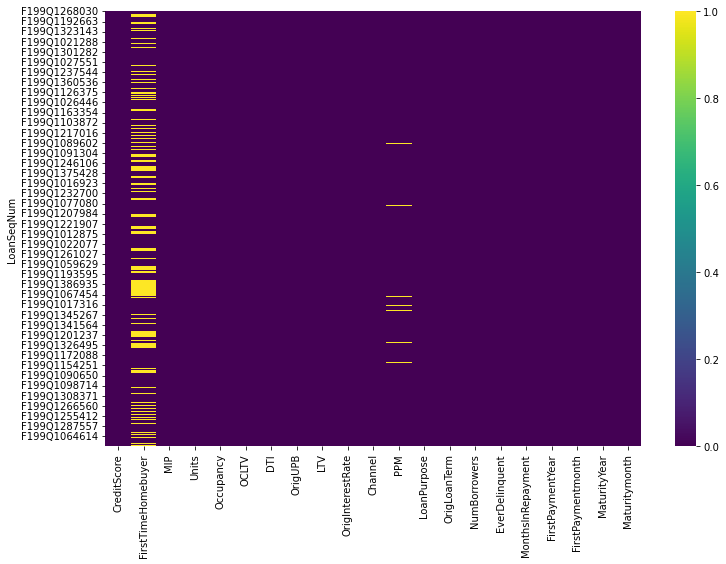

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(loan_data.isnull(), cmap='viridis')
plt.show()

#### Handling missing values 

In [20]:
def do_imputation(df, cols, strategy):
    
    imputer = SimpleImputer(strategy=strategy)
    imputed_df = pd.DataFrame(imputer.fit_transform(df[cols]))
    
    imputed_df.columns = cols
    
    return imputed_df


In [21]:
imputed_loan_data_num = do_imputation(loan_data, numerical_cols, 'median')
 
imputed_loan_data_cat = do_imputation(loan_data, categorical_cols, 'most_frequent')

imputed_loan_data = pd.concat([imputed_loan_data_num, imputed_loan_data_cat], axis=1)
print(imputed_loan_data.shape)
display(imputed_loan_data.head())
print(imputed_loan_data.isnull().sum())

(291451, 21)


,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,...,FirstPaymentYear,FirstPaymentmonth,MaturityYear,Maturitymonth,NumBorrowers,FirstTimeHomebuyer,Occupancy,Channel,PPM,LoanPurpose
0,850.0,25.0,1.0,89.0,27.0,117000.0,89.0,6.750,360.0,0.0,...,1999.0,2.0,2029.0,1.0,2.0,N,O,T,N,P
1,850.0,0.0,1.0,73.0,17.0,109000.0,73.0,6.500,360.0,0.0,...,1999.0,2.0,2029.0,1.0,1.0,N,O,R,N,N
2,850.0,0.0,1.0,75.0,16.0,88000.0,75.0,6.875,360.0,0.0,...,1999.0,2.0,2029.0,1.0,2.0,N,O,T,N,N
3,850.0,0.0,1.0,76.0,14.0,160000.0,76.0,6.875,360.0,0.0,...,1999.0,2.0,2029.0,1.0,2.0,N,O,R,N,N
4,850.0,0.0,1.0,78.0,18.0,109000.0,78.0,7.125,360.0,0.0,...,1999.0,2.0,2029.0,1.0,2.0,N,O,R,N,N


CreditScore           0
MIP                   0
Units                 0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
OrigLoanTerm          0
EverDelinquent        0
MonthsInRepayment     0
FirstPaymentYear      0
FirstPaymentmonth     0
MaturityYear          0
Maturitymonth         0
NumBorrowers          0
FirstTimeHomebuyer    0
Occupancy             0
Channel               0
PPM                   0
LoanPurpose           0
dtype: int64


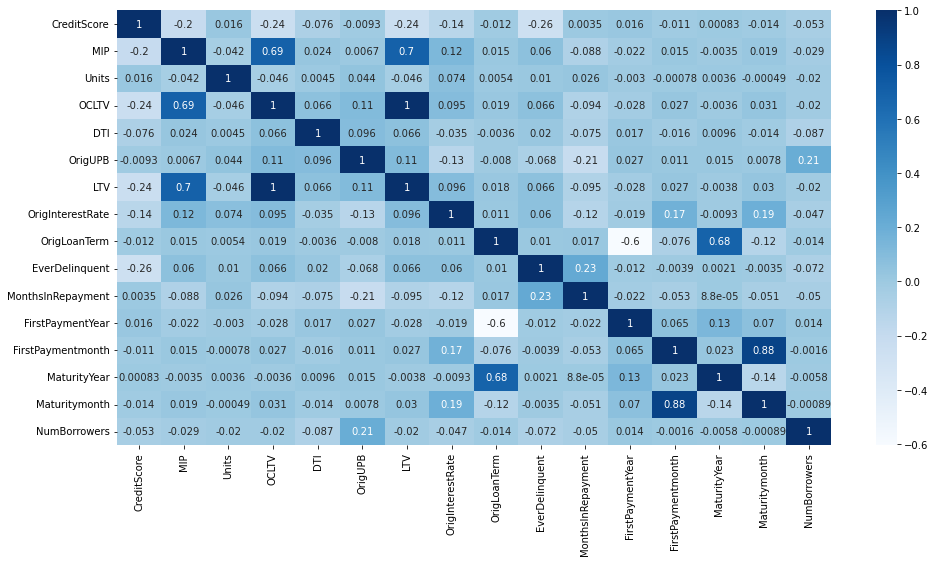

In [22]:
# check correlation between the features 
plt.figure(figsize=(16, 8))
sns.heatmap(imputed_loan_data.corr(), cbar=True, annot=True, cmap='Blues')
plt.show()

#### Positive Correlation: 
- EverDelinquent: MonthsInRepayment, OCLTV, LTV, MIP, OrigInterestRate, DTI
- MonthsInRepayment: EverDelinquent, Units, OrigLoanTerm
- OCLTV: LTV, MIP, OrigUPB, OrigInterestRate, DTI, EverDelinquent
- MIP: OCLTV, LTV, OrigInterestRate, EverDelinquent, DTI
- OrigInterestRate: Maturitymonth, FirstPaymentmonth, MIP, OCLTV, LTV, Units, EverDelinquent
- DTI: OrigUPB, OCLTV, LTV, MIP, EverDelinquent

#### Negative Correlation: 
- EverDelinquent: CreditScore, OrigUPB
- CreditScore: EverDelinquent, OCLTV, LTV, MIP, OrigInterestRate
- OrigUPB: MonthsInRepayment, OrigInterestRate, EverDelinquent

In [23]:
interest_cols = ["EverDelinquent", "MonthsInRepayment", "OCLTV", "LTV", "MIP", "OrigInterestRate", "Units", "OrigLoanTerm",
                "OrigUPB", "DTI", "Maturitymonth", "FirstPaymentmonth", "CreditScore"]
non_important_num_cols = list(set(numerical_cols) - set(interest_cols))

imputed_loan_data.drop(non_important_num_cols, axis=1, inplace=True)
print(imputed_loan_data.shape)

(291451, 18)


In [24]:
imputed_loan_data.to_csv("Data/imputed_loan_data.csv", index=False)

In [25]:
imputed_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  float64
 1   MIP                 291451 non-null  float64
 2   Units               291451 non-null  float64
 3   OCLTV               291451 non-null  float64
 4   DTI                 291451 non-null  float64
 5   OrigUPB             291451 non-null  float64
 6   LTV                 291451 non-null  float64
 7   OrigInterestRate    291451 non-null  float64
 8   OrigLoanTerm        291451 non-null  float64
 9   EverDelinquent      291451 non-null  float64
 10  MonthsInRepayment   291451 non-null  float64
 11  FirstPaymentmonth   291451 non-null  float64
 12  Maturitymonth       291451 non-null  float64
 13  FirstTimeHomebuyer  291451 non-null  object 
 14  Occupancy           291451 non-null  object 
 15  Channel             291451 non-nul

In [26]:
def plot_effect_num(data, x, y):
    fig, axes = plt.subplots(1, 3, figsize=(21, 7))
    fig.suptitle('Effect of {} to {}'.format(y, x))

    # scatter plot
    sns.scatterplot(ax=axes[0], data=data, y=y, x=x)
    axes[0].set_title("scatter plot")

#     histplot
    sns.histplot(ax=axes[1], data=data[y])
    axes[1].set_title("histogram")

    # box plot
    sns.boxplot(ax=axes[2], data=data, y=y, x=x)
    axes[2].set_title("box plot")
    
    plt.show()

**How do different features affect EverDelinquent?**

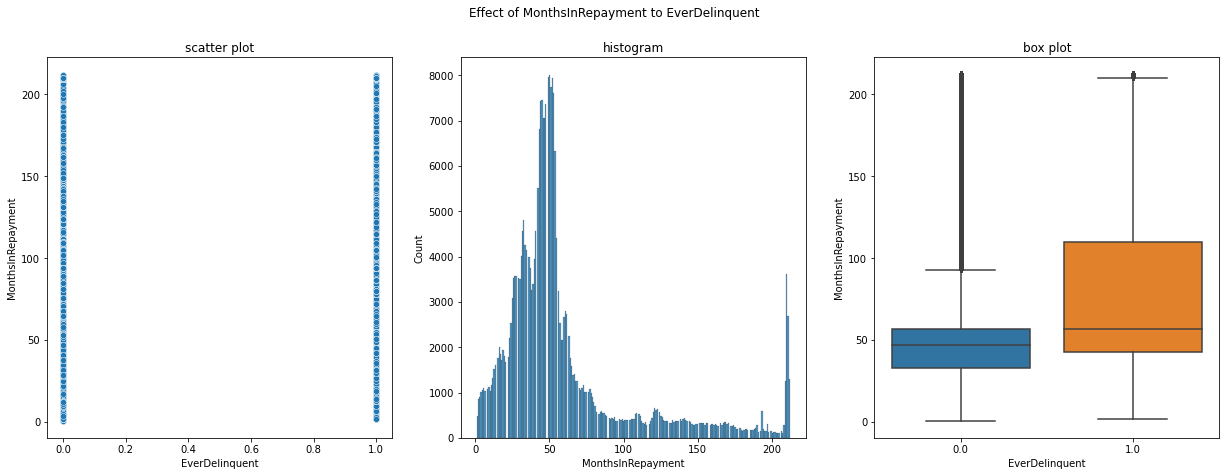

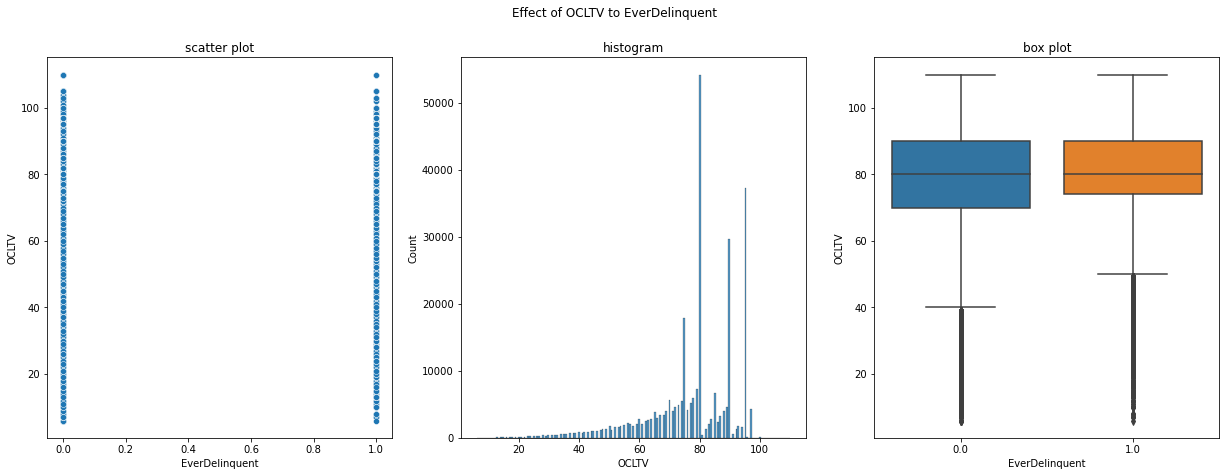

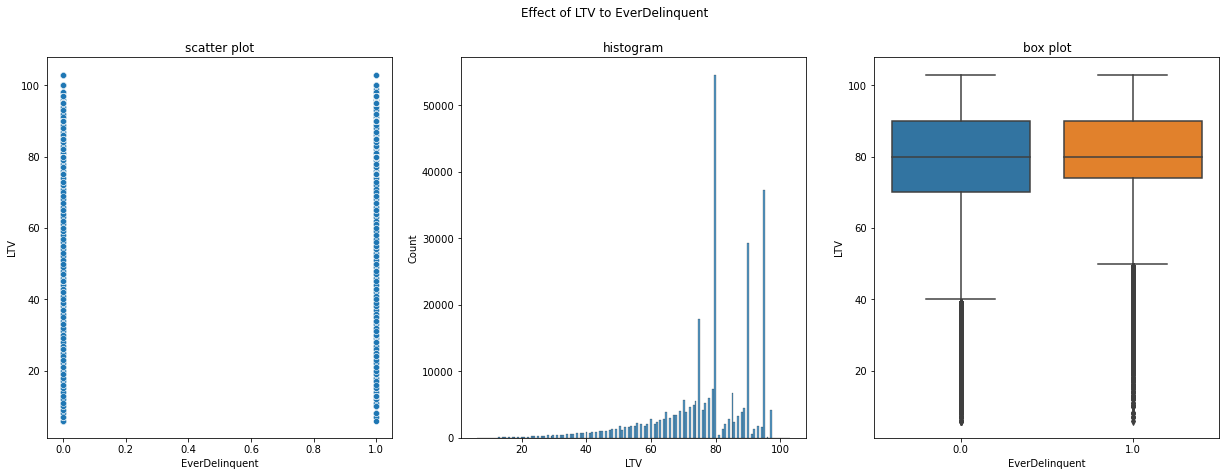

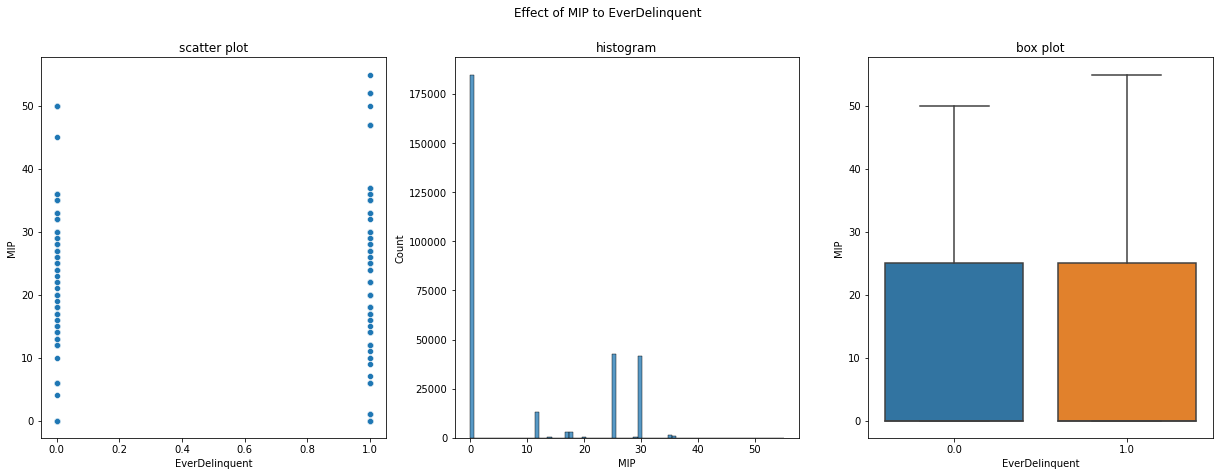

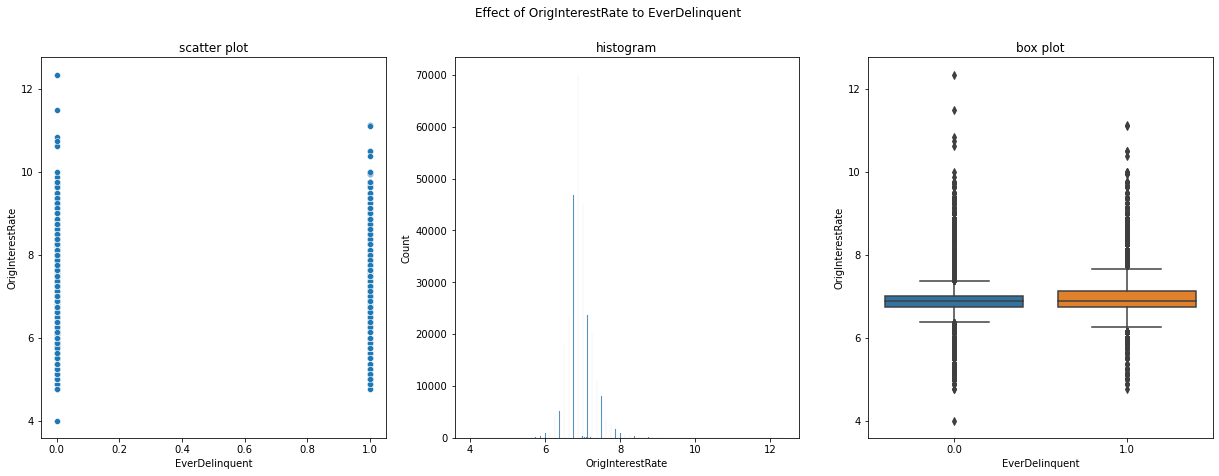

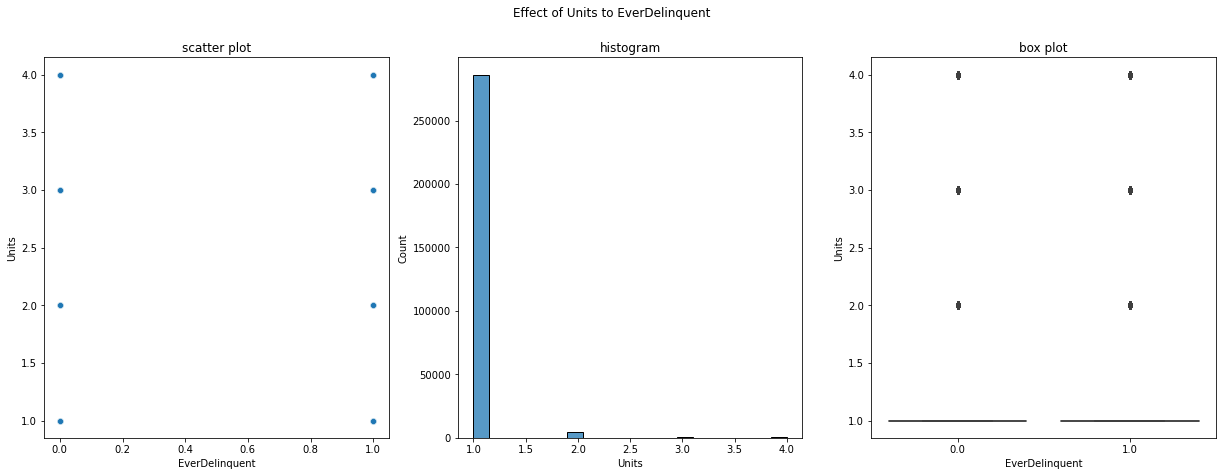

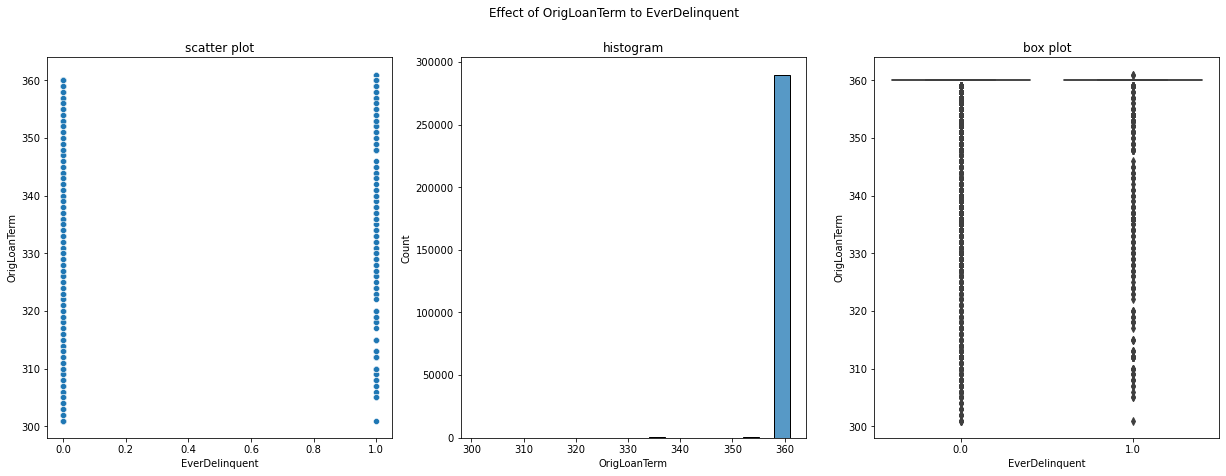

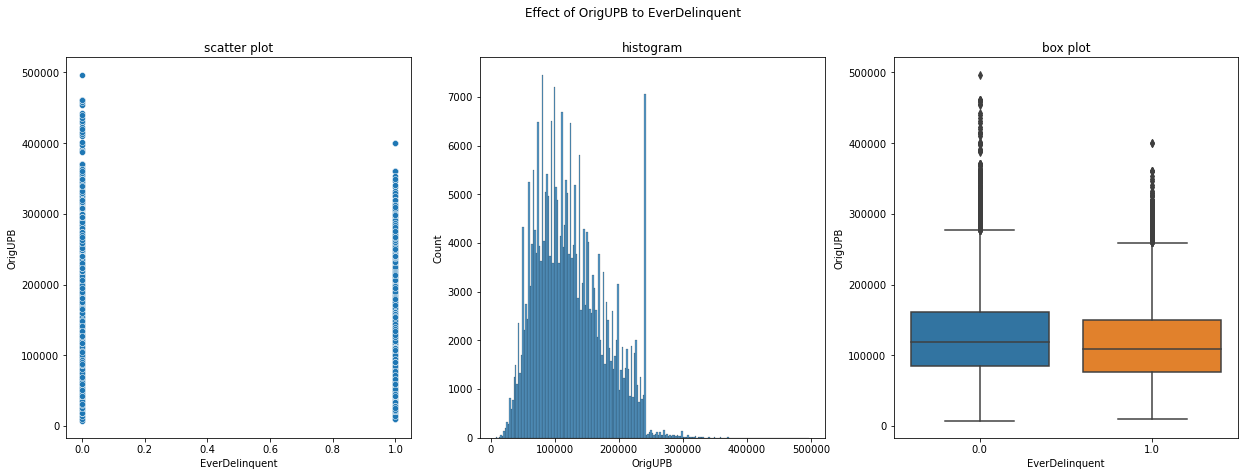

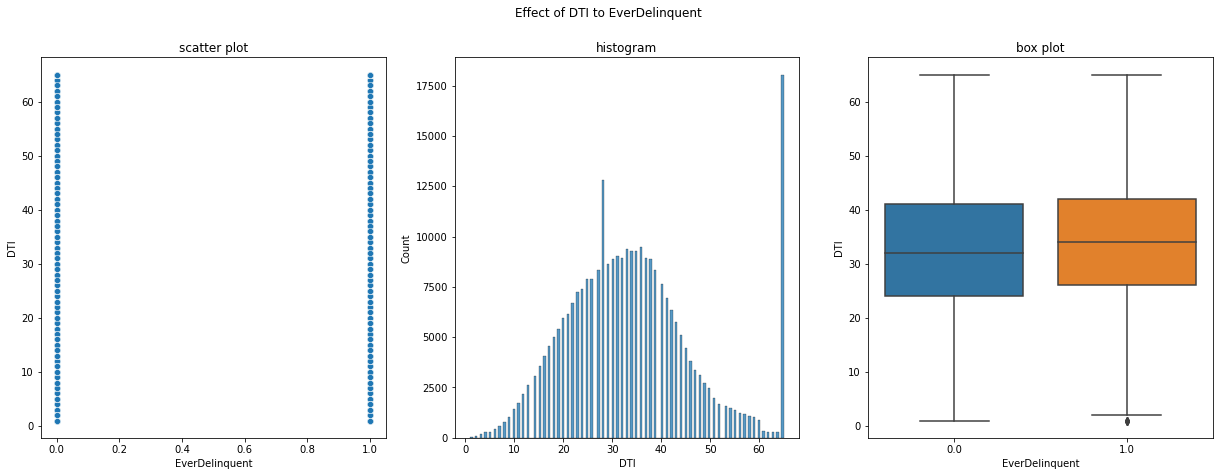

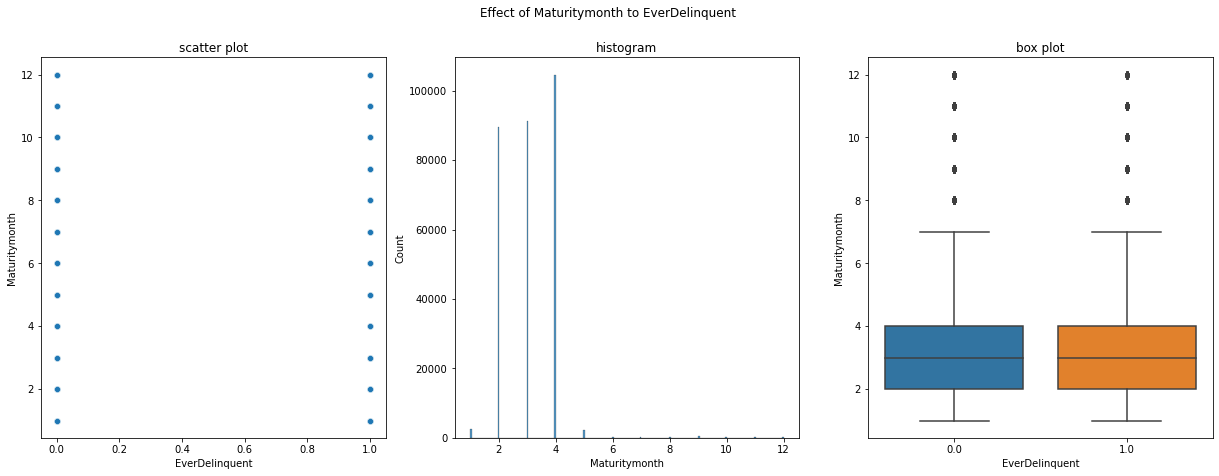

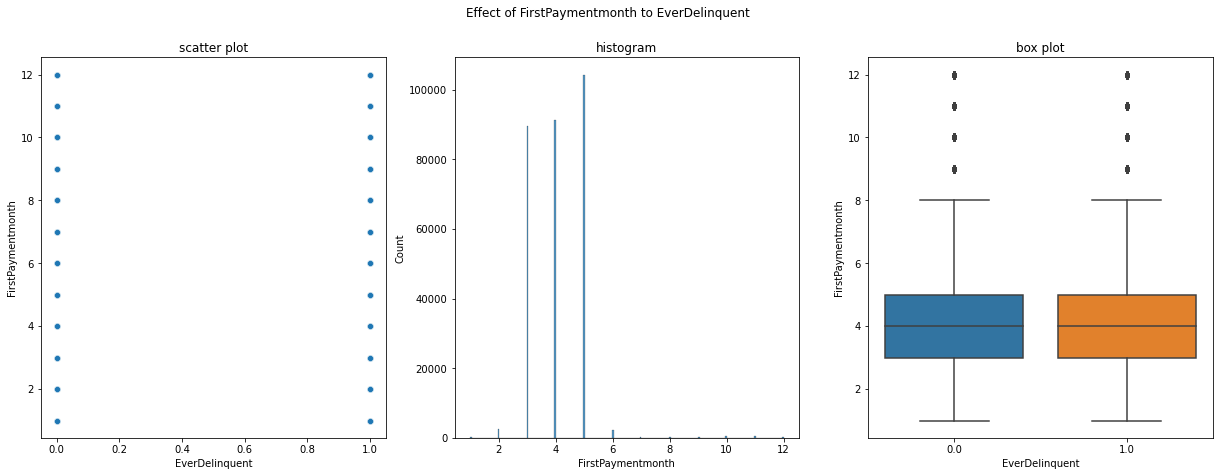

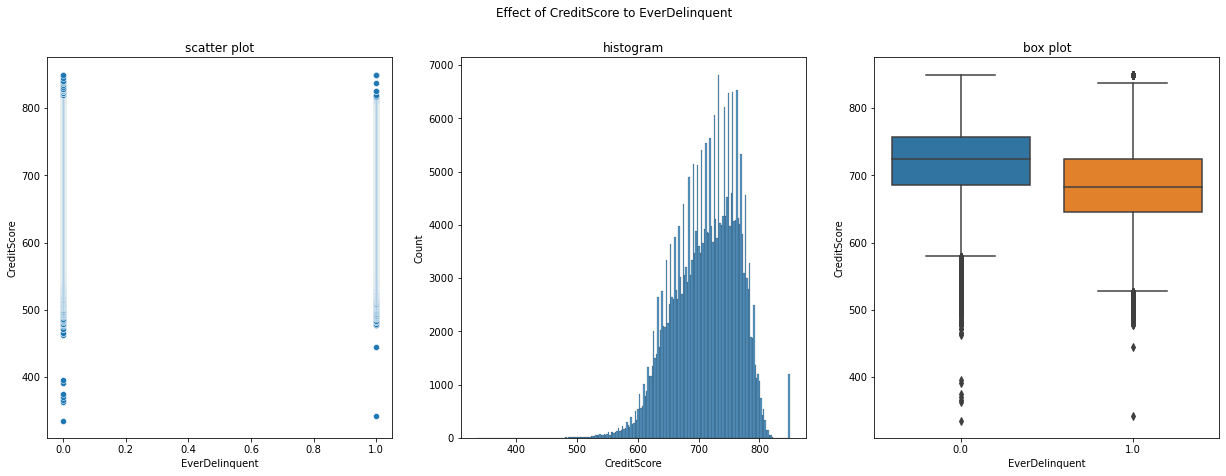

In [27]:
interest_cols_num = ["MonthsInRepayment", "OCLTV", "LTV", "MIP", "OrigInterestRate", "Units", "OrigLoanTerm", 
                     "OrigUPB", "DTI", "Maturitymonth", "FirstPaymentmonth", "CreditScore"]

for interest_col_num in interest_cols_num:
    plot_effect_num(data=imputed_loan_data, x="EverDelinquent", y=interest_col_num)

Notets:

1. We see that there are cases where EverDelinquent is 0, are outliers which are greater than 100 MonthsInRepayment 
2. There are outliers less than 40 OCLTV
3. OUtliers where MIP greater than 30
4. we can't ignore the values of units as it has just 4 values disregarding their frequencies

In [28]:
print(categorical_cols)

['FirstTimeHomebuyer', 'Occupancy', 'Channel', 'PPM', 'LoanPurpose']


In [29]:
# count unique values for each column 
print((imputed_loan_data.nunique()).sort_values())
print(imputed_loan_data.info())

FirstTimeHomebuyer      2
PPM                     2
EverDelinquent          2
LoanPurpose             3
Occupancy               3
Units                   4
Channel                 4
Maturitymonth          12
FirstPaymentmonth      12
MIP                    37
OrigLoanTerm           61
DTI                    65
LTV                    96
OCLTV                 101
MonthsInRepayment     212
OrigInterestRate      254
CreditScore           370
OrigUPB               375
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  float64
 1   MIP                 291451 non-null  float64
 2   Units               291451 non-null  float64
 3   OCLTV               291451 non-null  float64
 4   DTI                 291451 non-null  float64
 5   OrigUPB             291451 non-null  float64
 6   LTV

In [30]:
def plot_effect_cat(data, x, y):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle('Effect of {} to {}'.format(y, x))

    # violin plot
    sns.violinplot(ax=axes[0], data=imputed_loan_data, x=x, y=y, kind="violin")
    axes[0].set_title("violin plot")

#     histplot
    sns.histplot(ax=axes[1], data=imputed_loan_data[y])
    axes[1].set_title("histogram")
    
    plt.show()

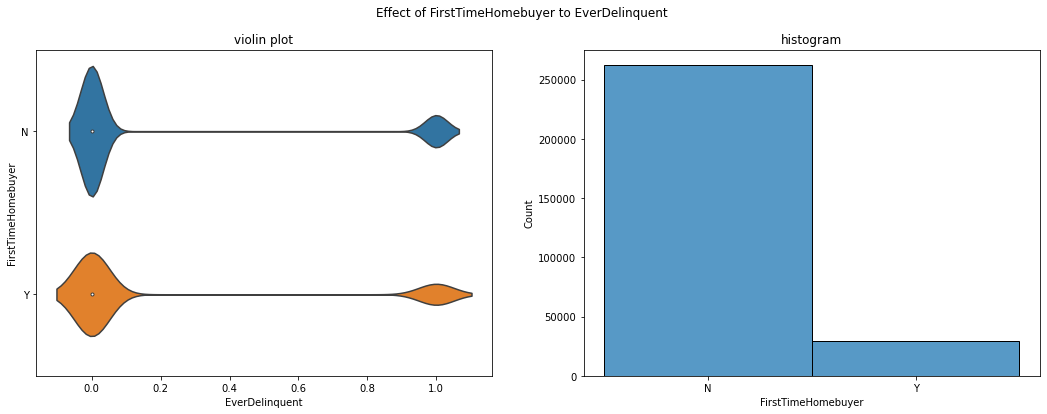

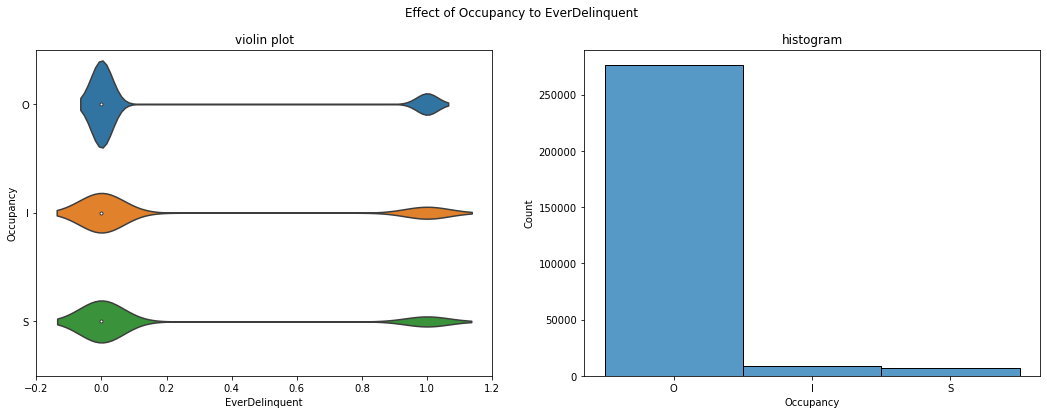

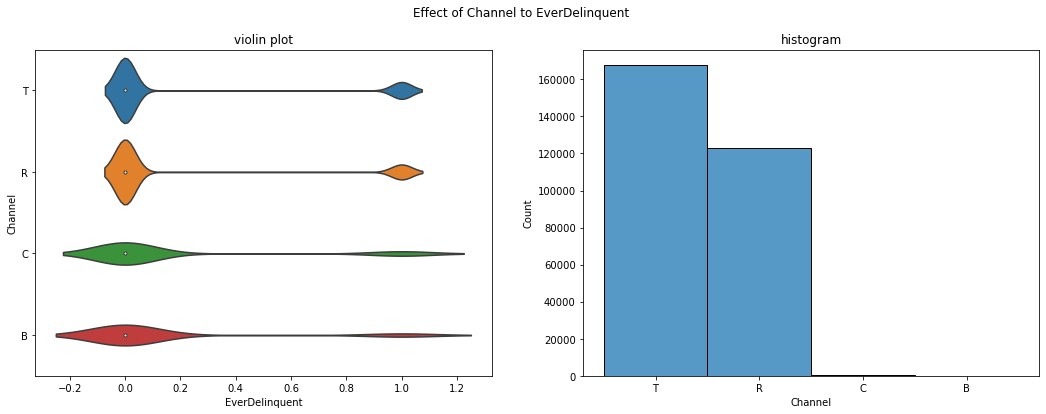

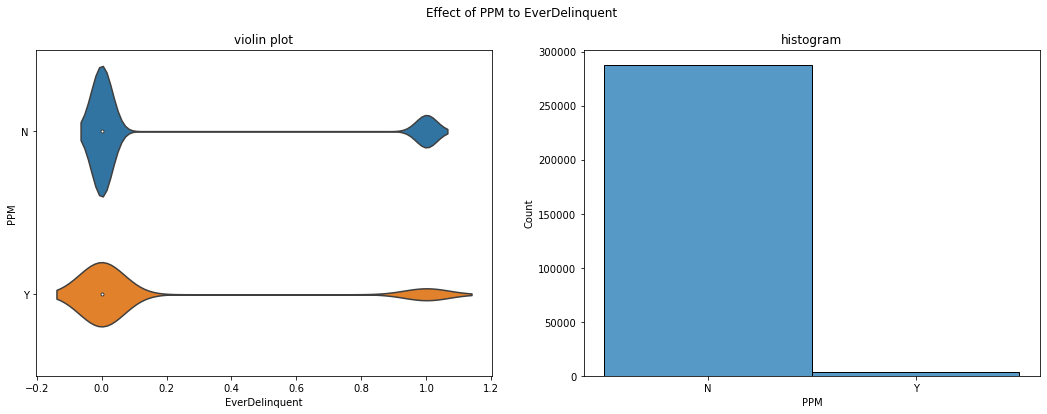

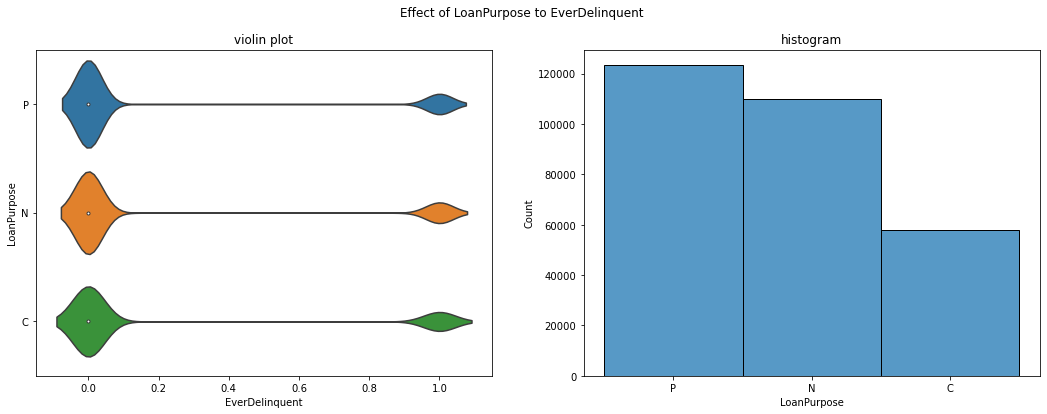

In [31]:
# select categorical columns with just have unique values less than 10 
interest_cols_cat = [col for col in categorical_cols if imputed_loan_data[col].nunique()<10]

for interest_col_cat in interest_cols_cat:
    plot_effect_cat(data=imputed_loan_data, x="EverDelinquent", y=interest_col_cat)

In [32]:
CS_range = pd.DataFrame(pd.cut(x=imputed_loan_data.CreditScore.to_numpy(), bins=[300, 438, 576, 714, 850],
                               labels=["bad", "good", "very good", "excellent"]))

OCLTV_range = pd.DataFrame(pd.cut(x=imputed_loan_data.OCLTV.to_numpy(), bins=[1, 37, 73, 110],
                               labels=["low", "medium", "high"]))

repayment_range = pd.DataFrame(pd.cut(x=imputed_loan_data.MonthsInRepayment.to_numpy(), bins=[0, 48, 96, 144, 192, 240],
                               labels=["0-4years", "4-8years", "8-12years", "12-16years", "16-20years"]))

imputed_loan_data["CS_range"] = CS_range
imputed_loan_data["OCLTV_range"] = OCLTV_range
imputed_loan_data["repayment_range"] = repayment_range

In [33]:
imputed_loan_data.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,...,FirstPaymentmonth,Maturitymonth,FirstTimeHomebuyer,Occupancy,Channel,PPM,LoanPurpose,CS_range,OCLTV_range,repayment_range
0,850.0,25.0,1.0,89.0,27.0,117000.0,89.0,6.750,360.0,0.0,...,2.0,1.0,N,O,T,N,P,excellent,high,4-8years
1,850.0,0.0,1.0,73.0,17.0,109000.0,73.0,6.500,360.0,0.0,...,2.0,1.0,N,O,R,N,N,excellent,medium,8-12years
2,850.0,0.0,1.0,75.0,16.0,88000.0,75.0,6.875,360.0,0.0,...,2.0,1.0,N,O,T,N,N,excellent,high,4-8years
3,850.0,0.0,1.0,76.0,14.0,160000.0,76.0,6.875,360.0,0.0,...,2.0,1.0,N,O,R,N,N,excellent,high,0-4years
4,850.0,0.0,1.0,78.0,18.0,109000.0,78.0,7.125,360.0,0.0,...,2.0,1.0,N,O,R,N,N,excellent,high,4-8years


In [34]:
for cat_col in categorical_cols:
    print(cat_col, imputed_loan_data[cat_col].unique())

FirstTimeHomebuyer ['N' 'Y']
Occupancy ['O' 'I' 'S']
Channel ['T' 'R' 'C' 'B']
PPM ['N' 'Y']
LoanPurpose ['P' 'N' 'C']


In [35]:
imputed_loan_data["FirstTimeHomebuyer"] = imputed_loan_data.FirstTimeHomebuyer.map({"N":0, "Y":1})
imputed_loan_data["Occupancy"] = imputed_loan_data.Occupancy.map({"O":1, "I":2, "S":3})
imputed_loan_data["Channel"] = imputed_loan_data.Channel.map({"T":1, "R":2, "C":3, "B":4})
imputed_loan_data["PPM"] = imputed_loan_data.PPM.map({"N":0, "Y":1})
imputed_loan_data["LoanPurpose"] = imputed_loan_data.LoanPurpose.map({"P":1, "N":2, "C":3})

In [36]:
imputed_loan_data.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,...,FirstPaymentmonth,Maturitymonth,FirstTimeHomebuyer,Occupancy,Channel,PPM,LoanPurpose,CS_range,OCLTV_range,repayment_range
0,850.0,25.0,1.0,89.0,27.0,117000.0,89.0,6.750,360.0,0.0,...,2.0,1.0,0,1,1,0,1,excellent,high,4-8years
1,850.0,0.0,1.0,73.0,17.0,109000.0,73.0,6.500,360.0,0.0,...,2.0,1.0,0,1,2,0,2,excellent,medium,8-12years
2,850.0,0.0,1.0,75.0,16.0,88000.0,75.0,6.875,360.0,0.0,...,2.0,1.0,0,1,1,0,2,excellent,high,4-8years
3,850.0,0.0,1.0,76.0,14.0,160000.0,76.0,6.875,360.0,0.0,...,2.0,1.0,0,1,2,0,2,excellent,high,0-4years
4,850.0,0.0,1.0,78.0,18.0,109000.0,78.0,7.125,360.0,0.0,...,2.0,1.0,0,1,2,0,2,excellent,high,4-8years


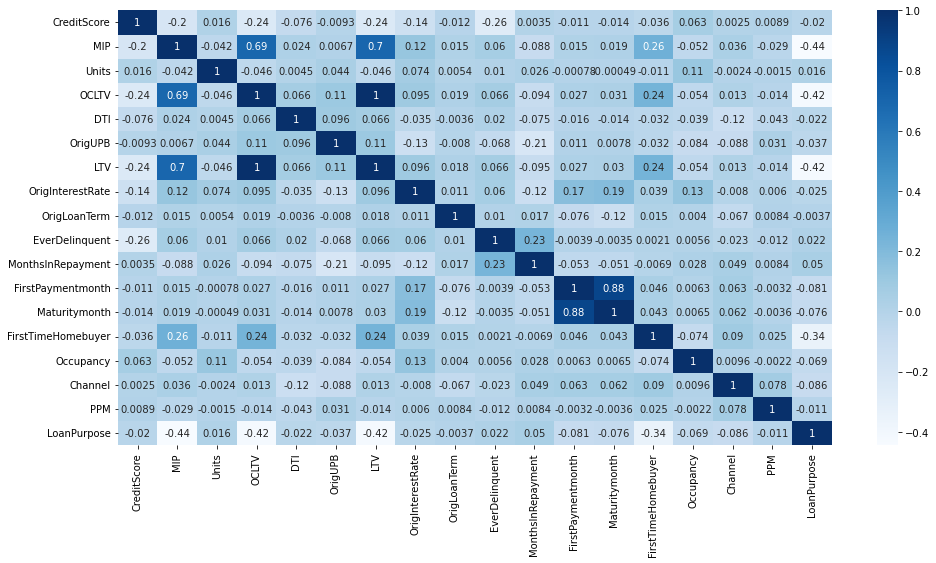

In [37]:
# check correlation between the features 
plt.figure(figsize=(16, 8))
sns.heatmap(imputed_loan_data.corr(), cbar=True, annot=True, cmap='Blues')
plt.show()

No Correlation features: 
- `PPM`, `channel` 

In [38]:
imputed_loan_data = imputed_loan_data.drop(["PPM", "Channel"], axis=1)
imputed_loan_data.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsInRepayment,FirstPaymentmonth,Maturitymonth,FirstTimeHomebuyer,Occupancy,LoanPurpose,CS_range,OCLTV_range,repayment_range
0,850.0,25.0,1.0,89.0,27.0,117000.0,89.0,6.750,360.0,0.0,52.0,2.0,1.0,0,1,1,excellent,high,4-8years
1,850.0,0.0,1.0,73.0,17.0,109000.0,73.0,6.500,360.0,0.0,144.0,2.0,1.0,0,1,2,excellent,medium,8-12years
2,850.0,0.0,1.0,75.0,16.0,88000.0,75.0,6.875,360.0,0.0,67.0,2.0,1.0,0,1,2,excellent,high,4-8years
3,850.0,0.0,1.0,76.0,14.0,160000.0,76.0,6.875,360.0,0.0,35.0,2.0,1.0,0,1,2,excellent,high,0-4years
4,850.0,0.0,1.0,78.0,18.0,109000.0,78.0,7.125,360.0,0.0,54.0,2.0,1.0,0,1,2,excellent,high,4-8years


In [39]:
df_grouped = imputed_loan_data.groupby(by=["CS_range", "FirstTimeHomebuyer", "OCLTV_range", "repayment_range"])
df_grouped.describe()

CreditScore  \
                                                               count   
CS_range  FirstTimeHomebuyer OCLTV_range repayment_range               
bad       0                  high        0-4years                2.0   
                                         12-16years              1.0   
                             medium      0-4years                1.0   
                                         12-16years              1.0   
                                         4-8years                2.0   
...                                                              ...   
very good 1                  medium      0-4years              268.0   
                                         12-16years             45.0   
                                         16-20years             48.0   
                                         4-8years              189.0   
                                         8-12years              50.0   

                                                                      \
                                                                mean   
CS_range  FirstTimeHomebuyer OCLTV_range repayment_range               
bad       0                  high        0-4years         380.500000   
                                         12-16years       342.000000   
                             medium      0-4years         363.000000   
                                         12-16years       335.000000   
                                         4-8years         370.500000   
...                                                              ...   
very good 1                  medium      0-4years         671.992537   
                                         12-16years       659.666667   
                                         16-20years       666.791667   
                                         4-8years         670.941799   
                                         8-12years        672.640000   

                                                                            \
                                                                std    min   
CS_range  FirstTimeHomebuyer OCLTV_range repayment_range                     
bad       0                  high        0-4years         14.849242  370.0   
                                         12-16years             NaN  342.0   
                             medium      0-4years               NaN  363.0   
                                         12-16years             NaN  335.0   
                                         4-8years          6.363961  366.0   
...                                                             ...    ...   
very good 1                  medium      0-4years         31.094274  577.0   
                                         12-16years       36.725022  586.0   
                                         16-20years       32.450262  585.0   
                                         4-8years         34.309942  587.0   
                                         8-12years        27.564959  615.0   

                                                                         \
                                                             25%    50%   
CS_range  FirstTimeHomebuyer OCLTV_range repayment_range                  
bad       0                  high        0-4years         375.25  380.5   
                                         12-16years       342.00  342.0   
                             medium      0-4years         363.00  363.0   
                                         12-16years       335.00  335.0   
                                         4-8years         368.25  370.5   
...                                                          ...    ...   
very good 1                  medium      0-4years         650.00  676.5   
                                         12-16years       625.00  665.0   
                                         16-20years       645.50  665.5   
                                         4-8ye

In [40]:
# target variale 
target_feature = imputed_loan_data["EverDelinquent"]
total_features = imputed_loan_data.drop(["EverDelinquent"], axis=1)

num_features = [col for col in total_features.columns if
                 total_features[col].dtype in ['int64', 'float64']]

# apply log transform to numerical features 
features_log_transform = pd.DataFrame(data=total_features)
features_log_transform[num_features] = total_features[num_features].apply(lambda x: np.log(x + 1))